# Betting Line Movement

In [14]:
import pandas as pd
import json
import os

import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('default')

In [15]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
from highlight_text import fig_text

body_font = "Open Sans"
watermark_font = "DejaVu Sans"
text_color = "w"
background = "#282B2F"
title_font = "DejaVu Sans"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['text.color'] = text_color
mpl.rcParams['axes.edgecolor'] = text_color
mpl.rcParams['xtick.labelsize'] = 6
mpl.rcParams['ytick.labelsize'] = 6

In [16]:
home_c = '#01497c'
draw_c = '#daf3f0'
away_c = '#318f88'

In [17]:
df = []

for file in os.listdir('../data/betting/2021-22/22/'):
    if file == '2021-22.csv': continue

    with open(f'../data/betting/2021-22/22/{file}') as f:
        odds = json.load(f)

        game = [game for game in odds['data'] if game['id'] == '2d936ba00ecb86ae3469d6d53c636c8f'][0]
        teams = game['teams']
        home = game['home_team']

        odds_betclic = [site for site in game['sites'] if site['site_key'] == 'betclic']
        df.append([
            file[:-5],
            odds_betclic[0]['last_update'],
            odds_betclic[0]['odds']['h2h'][0],
            odds_betclic[0]['odds']['h2h'][1],
            odds_betclic[0]['odds']['h2h'][2]
            ])

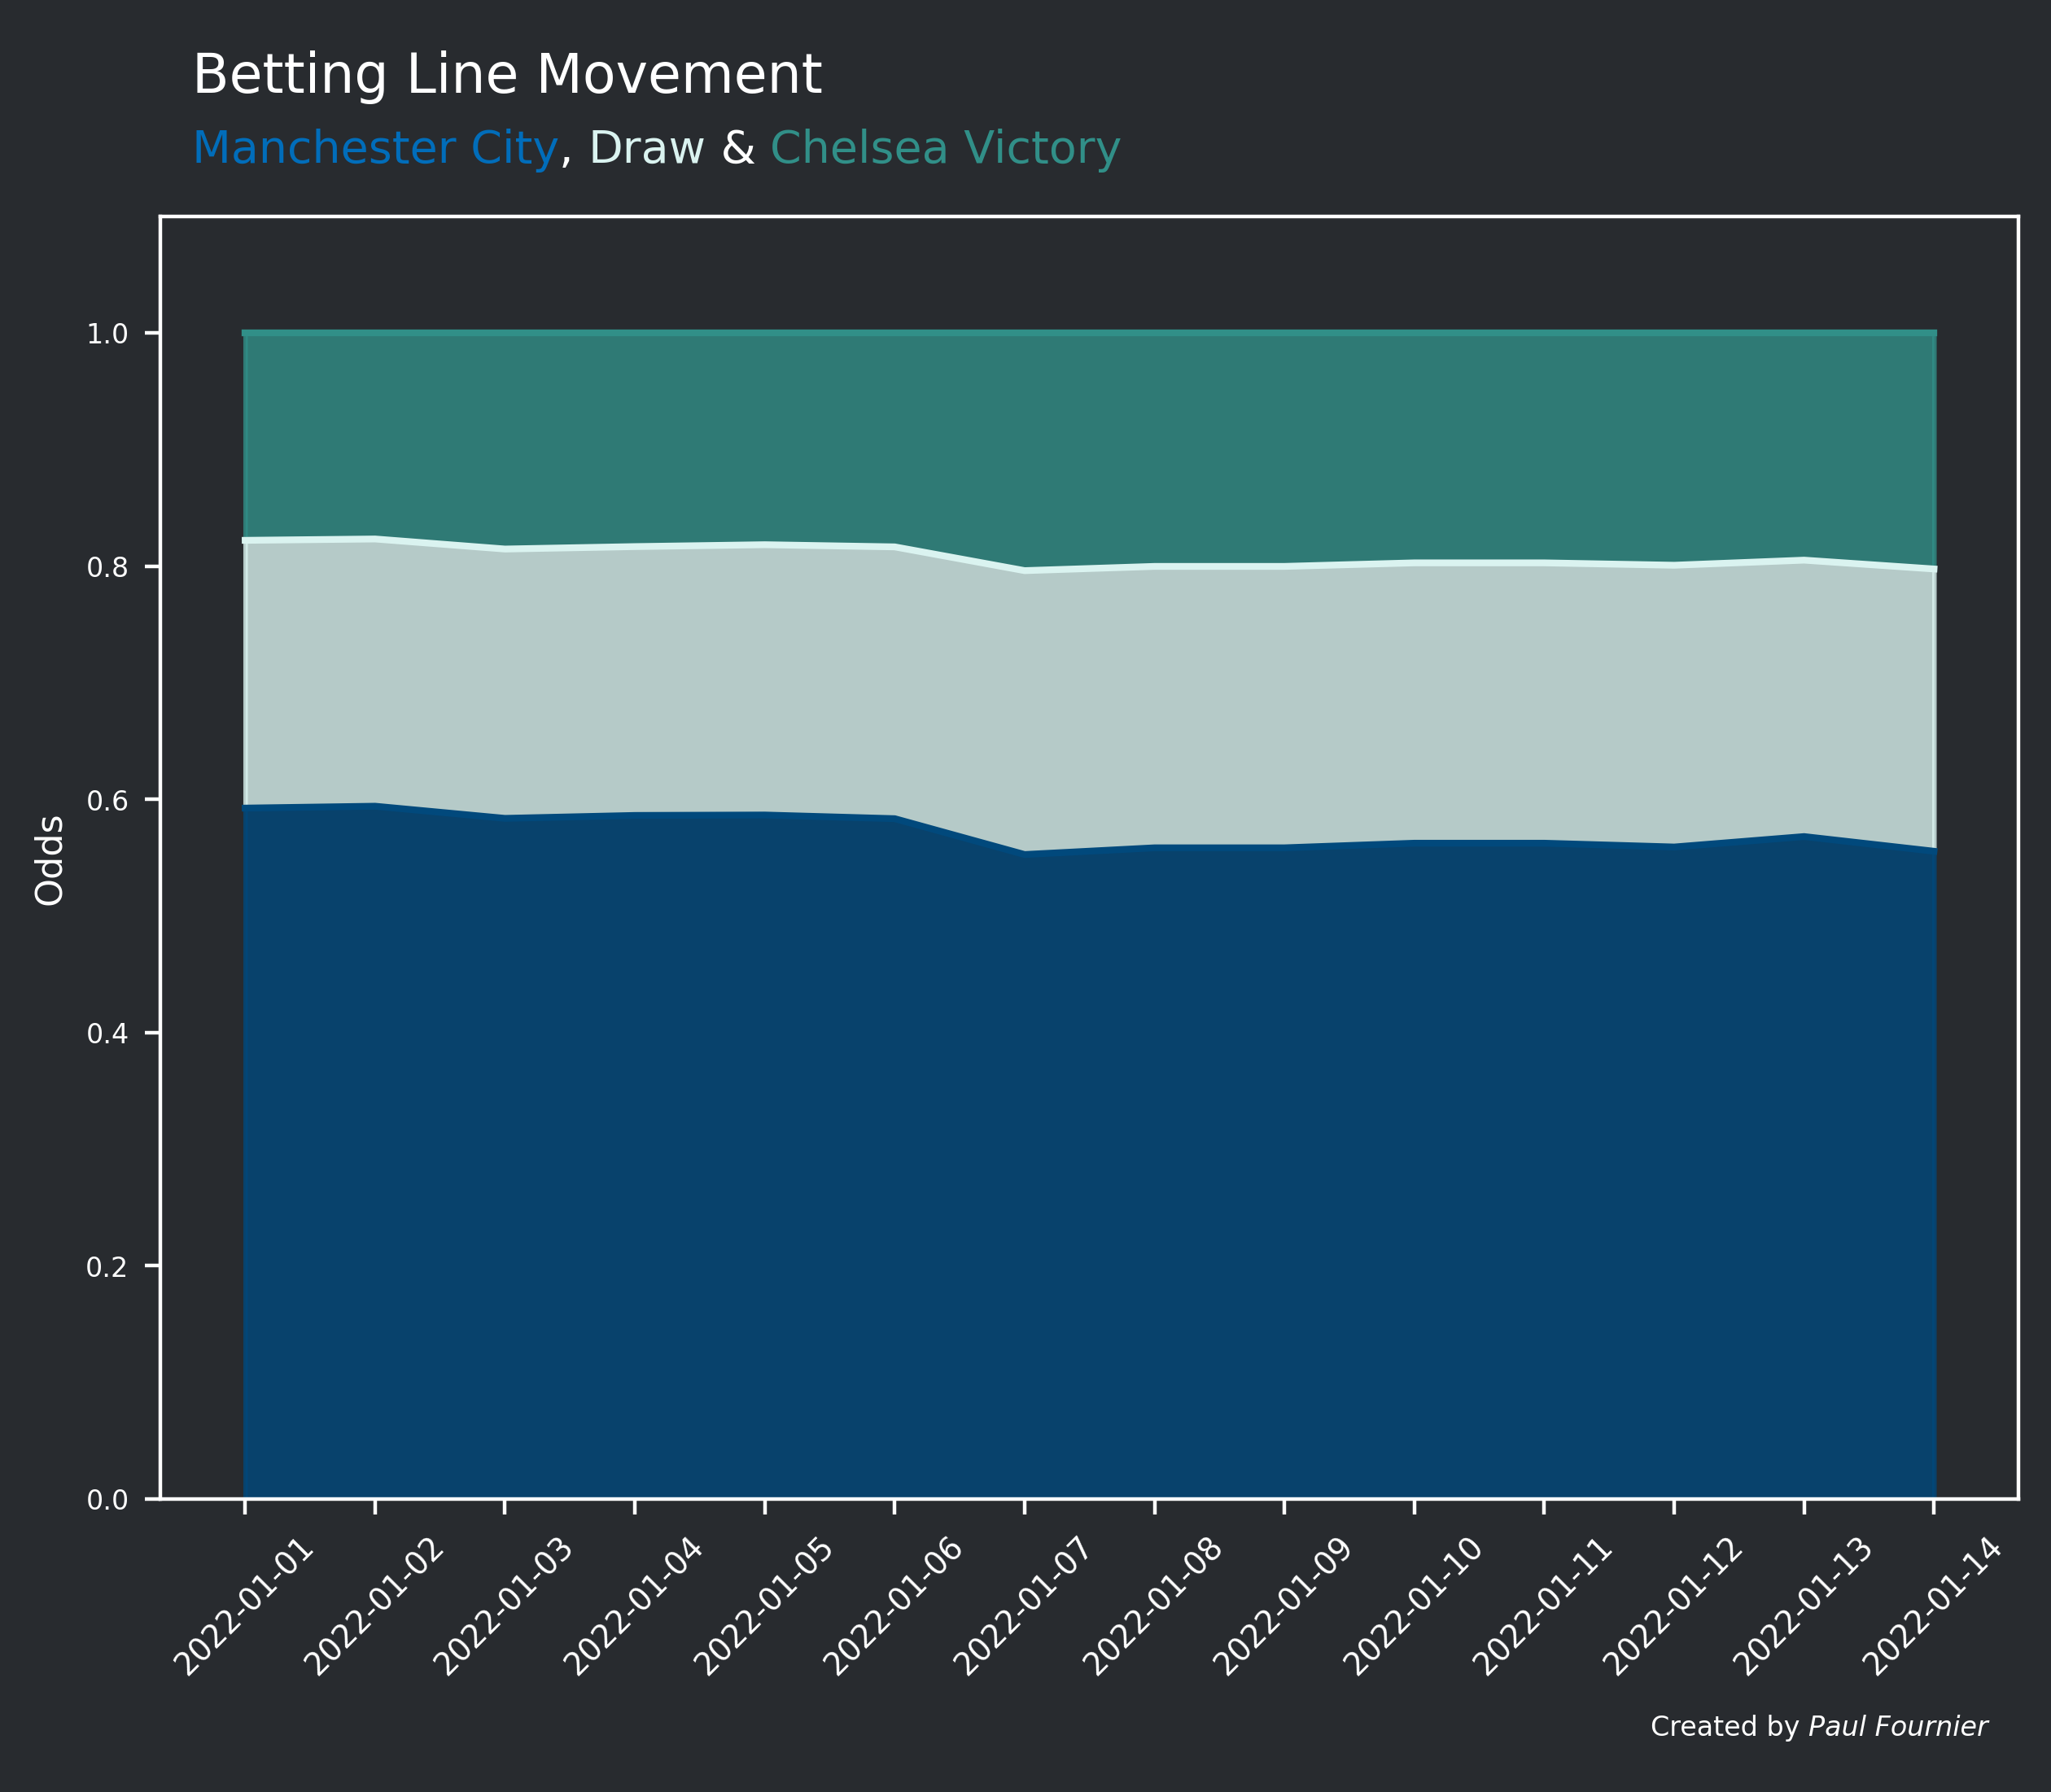

In [18]:
fig, ax = plt.subplots(tight_layout=True)
fig.set_facecolor(background)
ax.patch.set_alpha(0)

df = pd.DataFrame(df).sort_values(0, ignore_index=True)
df['odds_away'] = 100 / df[2] / (100/df[2] + 100/df[3] + 100/df[4])
df['odds_home'] = 100 / df[3] / (100/df[2] + 100/df[3] + 100/df[4])
df['odds_draw'] = 100 / df[4] / (100/df[2] + 100/df[3] + 100/df[4])

ax.plot(df[0], df['odds_home'], color=home_c)
#Fill under the curve
plt.fill_between(
    x = df[0],
    y1 = df['odds_home'],
    color = home_c,
    alpha = 0.8)

ax.plot( df[0], df['odds_home'] + df['odds_draw'], color=draw_c)
plt.fill_between(
     x = df[0],
     y1 = df['odds_home'] + df['odds_draw'],
     y2 = df['odds_home'],
     color = draw_c,
     alpha = 0.8)

ax.plot(df[0], df['odds_home'] + df['odds_draw'] + df['odds_away'], color=away_c)
plt.fill_between(
    x = df[0],
    y1 = df['odds_home'] + df['odds_draw'] + df['odds_away'],
    y2 = df['odds_home'] + df['odds_draw'],
    color = away_c,
    alpha = 0.8)

ax.set_ylabel('Odds' , fontsize=8, color=text_color)
ax.set_ylim([0, 1.1])
plt.xticks(rotation=45, fontweight='light',  fontsize='x-small',)

fig_text(
    x=0.1, y=1.075,
    s="Betting Line Movement",
    fontsize=12, fontfamily=title_font, color=text_color, alpha=1)
fig_text(
    x=0.1, y=1.025,
    s=f"<{home}>, <Draw> & <{[team for team in teams if team != home][0]} Victory>",
    highlight_textprops=[
            {"color": '#016DBA'},
            {"color": draw_c},
            {"color": away_c}
        ],
    fontsize=10, fontfamily=title_font, color=text_color, alpha=1)

fig_text(
    x=0.8, y=0.01,
    s="Created by <Paul Fournier>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=6, fontfamily=watermark_font, color=text_color)

plt.show()

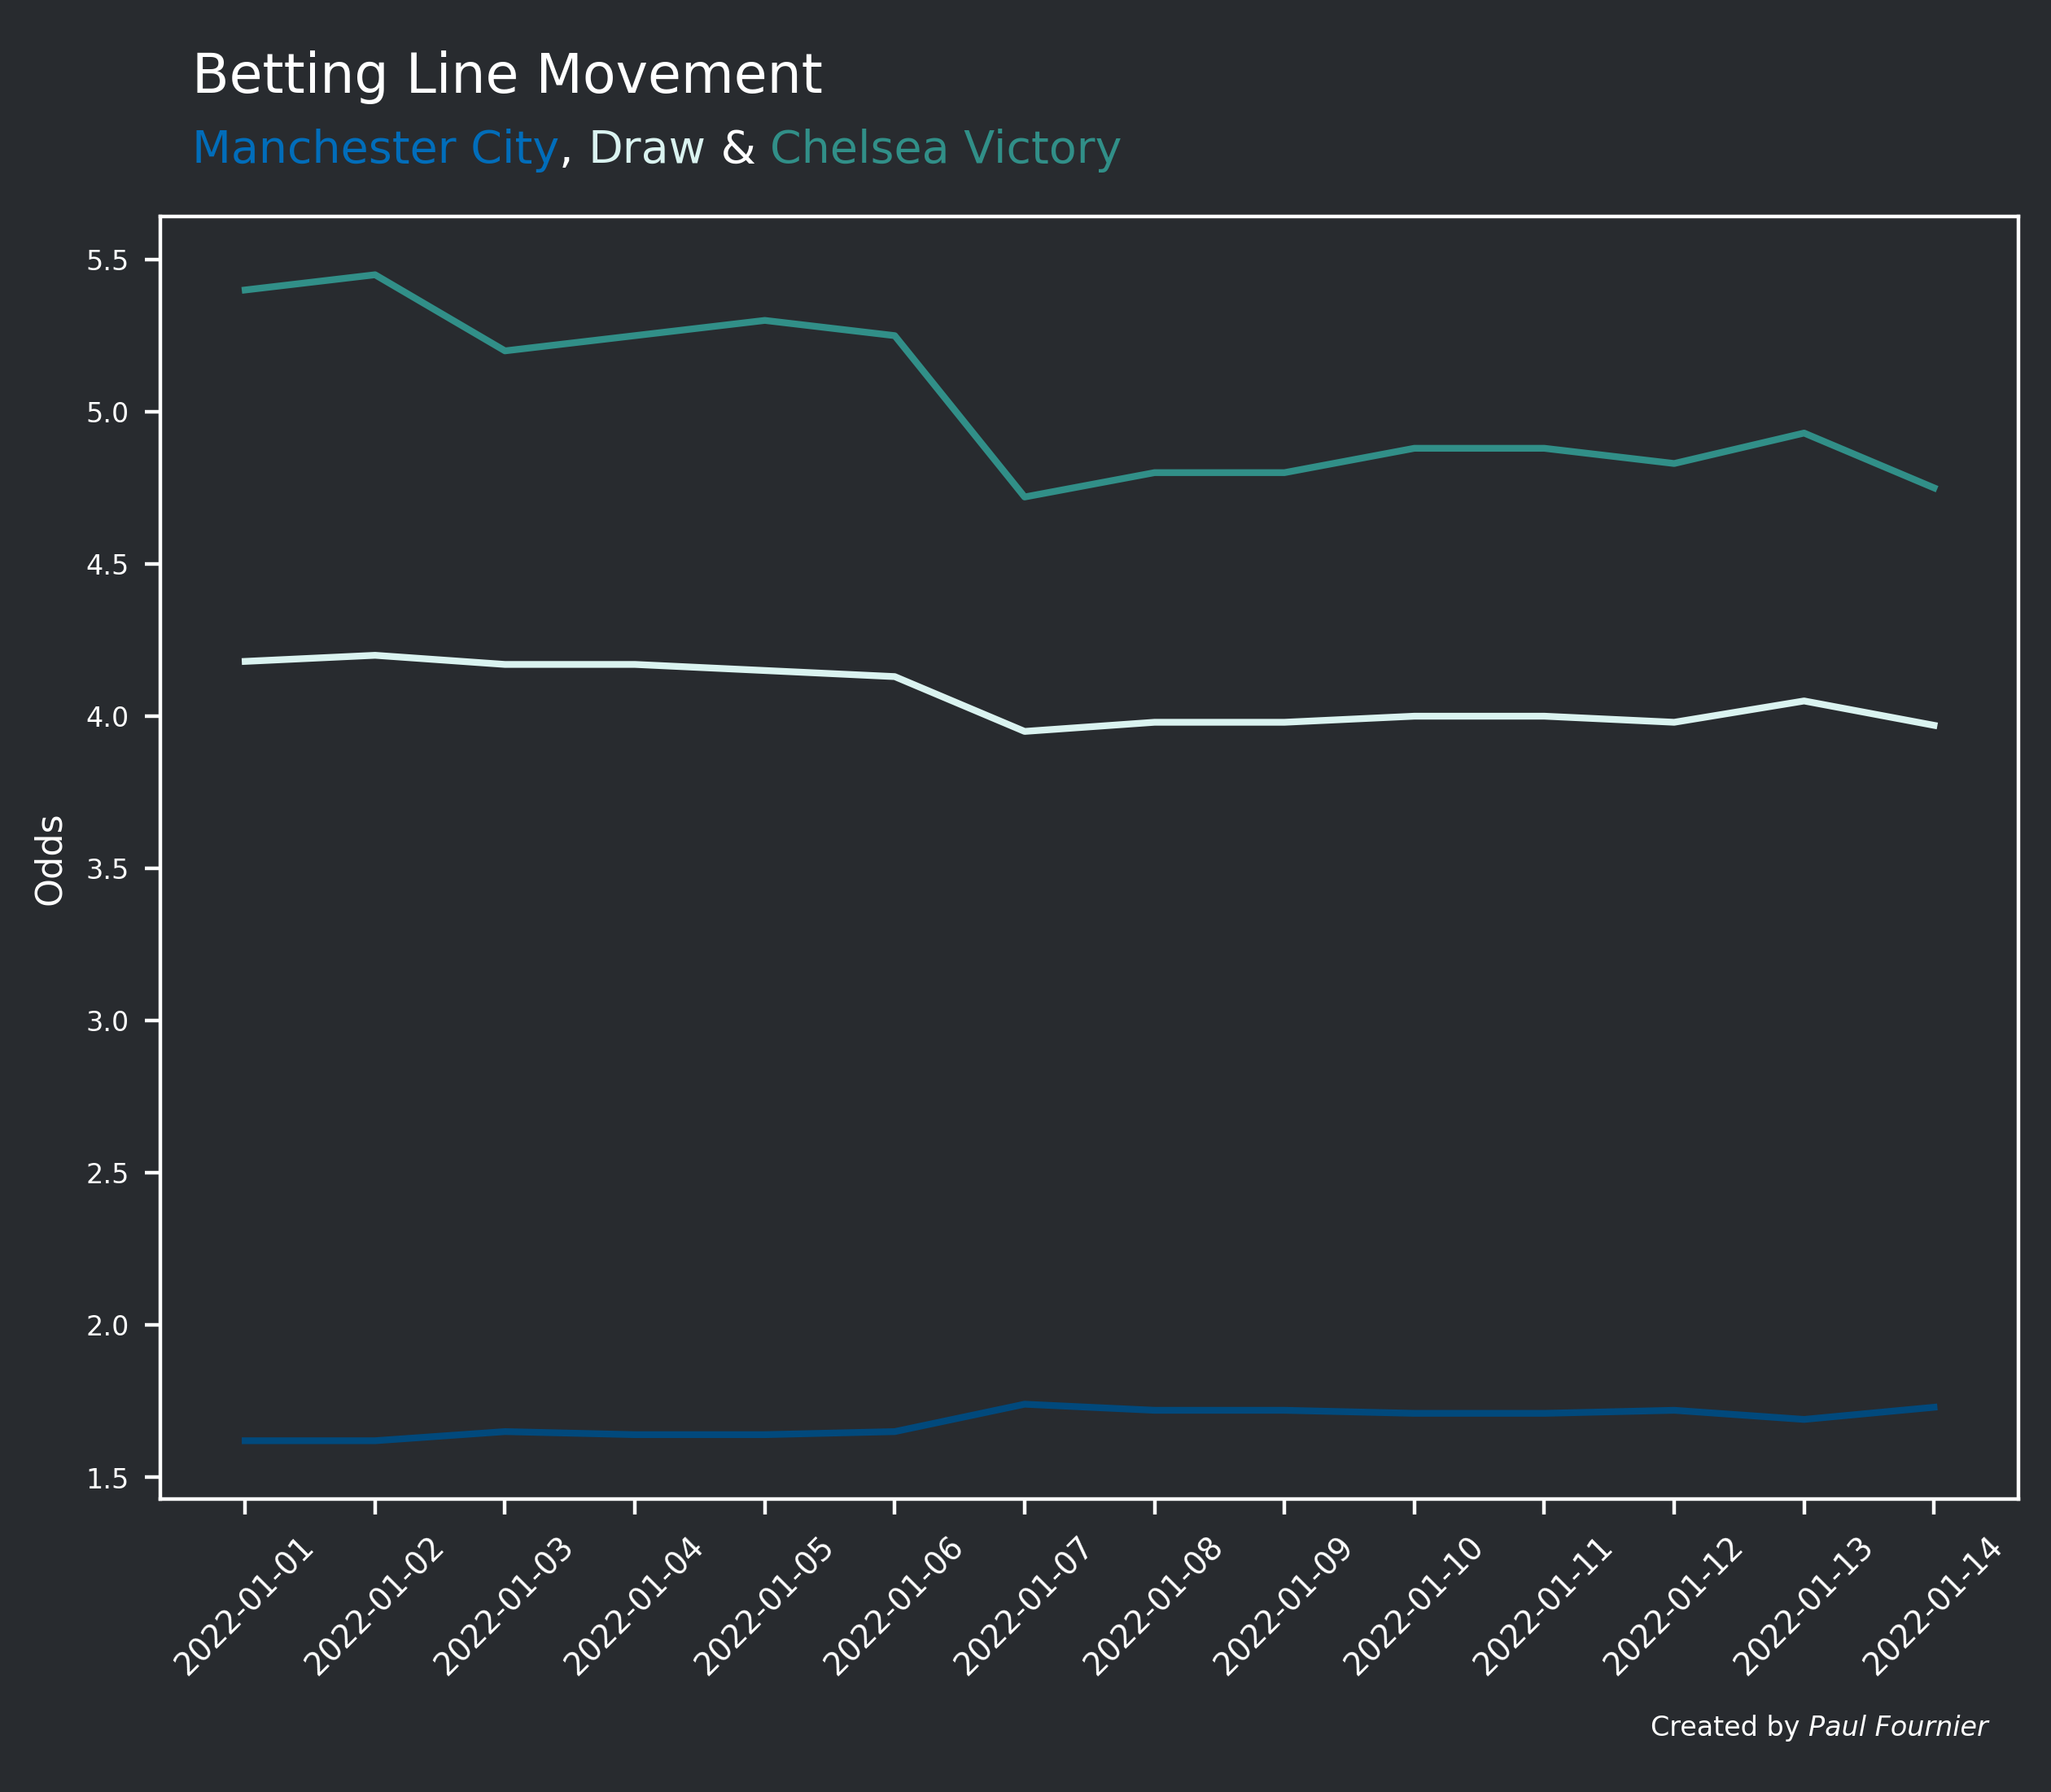

In [19]:
fig, ax = plt.subplots(tight_layout=True)
fig.set_facecolor(background)
ax.patch.set_alpha(0)

df = pd.DataFrame(df).sort_values(0, ignore_index=True)
df['odds_away'] = df[2]
df['odds_home'] = df[3]
df['odds_draw'] = df[4]

ax.plot(df[0], df['odds_home'], color=home_c)

ax.plot( df[0], df['odds_draw'], color=draw_c)

ax.plot(df[0], df['odds_away'], color=away_c)

ax.set_ylabel('Odds' , fontsize=8, color=text_color)

plt.xticks(rotation=45, fontweight='light',  fontsize='x-small',)

fig_text(
    x=0.1, y=1.075,
    s="Betting Line Movement",
    fontsize=12, fontfamily=title_font, color=text_color, alpha=1)
fig_text(
    x=0.1, y=1.025,
    s=f"<{home}>, <Draw> & <{[team for team in teams if team != home][0]} Victory>",
    highlight_textprops=[
            {"color": '#016DBA'},
            {"color": draw_c},
            {"color": away_c}
        ],
    fontsize=10, fontfamily=title_font, color=text_color, alpha=1)

fig_text(
    x=0.8, y=0.01,
    s="Created by <Paul Fournier>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=6, fontfamily=watermark_font, color=text_color)

plt.show()